Process 0 requires 7 pages and has a quality 3
[6, 4, 5, 6, 1, 2, 1] 18057
Written process  0 to  AR_00.txt
Process 1 requires 12 pages and has a quality 2
[4, 9, 4, 6, 10, 11, 10, 8, 6, 2, 1, 3] 22012
Written process  1 to  AR_01.txt
Process 2 requires 11 pages and has a quality 3
[8, 9, 7, 0, 0, 8, 5, 4, 0, 0, 6] 24524
Written process  2 to  AR_02.txt
Process 3 requires 9 pages and has a quality 0
[3, 4, 3, 3, 5, 5, 5, 0, 3] 17408
Written process  3 to  AR_03.txt
Process 4 requires 13 pages and has a quality 4
[6, 8, 2, 9, 4, 12, 9, 2, 12, 10, 2, 7, 9] 30871
Written process  4 to  AR_04.txt
Process 5 requires 3 pages and has a quality 1
[0, 1, 2] 5541
Written process  5 to  AR_05.txt
[1, 4, 0, 3, 2, 5]
Reading Process from AR_00.txt
Reading Process from AR_01.txt
Reading Process from AR_02.txt
Reading Process from AR_03.txt
Reading Process from AR_04.txt
Reading Process from AR_05.txt
[27545. 26993. 26263. ... 16086. 23919.  2162.]


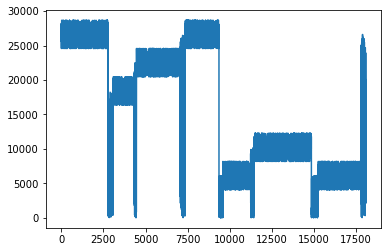

Process 0 requires 9 pages and has a quality 2
[0, 6, 3, 8, 1, 2, 2, 2, 5] 18687
Written process  0 to  AR_00.txt
Process 1 requires 5 pages and has a quality 4
[2, 2, 1, 0, 0] 15368
Written process  1 to  AR_01.txt
[0, 1]
Reading Process from AR_00.txt
Reading Process from AR_01.txt
[2958. 1369. 1812. ... 9876. 6724. 4744.]


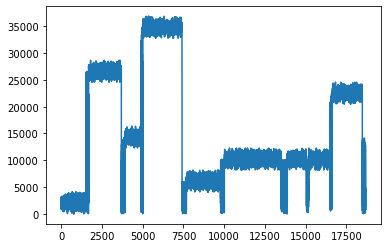

Process 0 requires 7 pages and has a quality 1
[1, 2, 4, 4, 6, 2, 3] 15592
Written process  0 to  AR_00.txt
Process 1 requires 7 pages and has a quality 3
[2, 1, 0, 3, 5, 1, 4] 14538
Written process  1 to  AR_01.txt
Process 2 requires 10 pages and has a quality 1
[2, 4, 5, 2, 7, 8, 9, 4, 1, 3] 23856
Written process  2 to  AR_02.txt
[2, 1, 0]
Reading Process from AR_00.txt
Reading Process from AR_01.txt
Reading Process from AR_02.txt
[5960. 6291. 6232. ... 5779. 2471. 2128.]


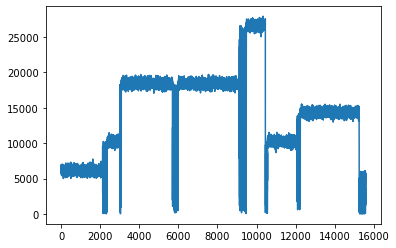

In [7]:
import numpy as np
import math
import os
import random
from matplotlib import pyplot as plt
import queue
from tkinter import *

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
root=Tk()
root.geometry('1920x1080')

topframe=Frame(root,height=100,width=1080,padx=20,pady=20,relief=RIDGE,bd=5)
topframe.grid(row=0,column=0)

label=Label(topframe,text='Page size')
label.grid(row=0,column=0)
page_size_entry=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold')
                     )
page_size_entry.grid(row=1,column=0,padx=5)

label=Label(topframe,text='No of Process')
label.grid(row=0,column=1)
no_process_entry=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
no_process_entry.grid(row=1,column=1,padx=5)

label=Label(topframe,text='No of Frames')
label.grid(row=0,column=2)
no_frames_entry=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
no_frames_entry.grid(row=1,column=2,padx=5)

label=Label(topframe,text='Invalid')
label.grid(row=0,column=3)
invalid=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
invalid.grid(row=1,column=3,padx=5)

label=Label(topframe,text='PID')
label.grid(row=0,column=4)
pid=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
pid.grid(row=1,column=4,padx=5)

label=Label(topframe,text='Frame')
label.grid(row=0,column=5)
frame=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
frame.grid(row=1,column=5,padx=5)

label=Label(topframe,text='Completed')
label.grid(row=2,column=0)
completed=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
completed.grid(row=3,column=0)

label=Label(topframe,text='Incomplete')
label.grid(row=2,column=1)
incomplete=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
incomplete.grid(row=3,column=1)

label=Label(topframe,text='FIFO Global')
label.grid(row=2,column=2)
fifo_g=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
fifo_g.grid(row=3,column=2)

label=Label(topframe,text='Oldest_frame')
label.grid(row=2,column=3)
oldest_f=Entry(topframe,justify=CENTER,relief=RIDGE,bd=10,width=8,font=('Ariel',20,'bold'))
oldest_f.grid(row=3,column=3)

mainframe=Frame(root,height=980,width=1820)
mainframe.grid(row=1,column=0)

PAGE_SIZE = 0                    # Page Size in Bytes
NP = 0                              # No. of processes in memory
F = 0                              # No. of Frames in physical memory
INVALID = 0
PID = 0                             # Used for Indexing into Frames
FRAME = 0                          # Used for Indexing into Frames
COMPLETED = 0                      # Process Status Flags
INCOMPLETE = 0                     #
# The following are page replacement algorithm types
FIFO_GLOBAL = 0
oldest_frame = 0
loc_oldest_frame = np.zeros(F).astype('int32')
phys_mem = np.full((F,2), INVALID).astype('int32')
pr_status = np.full(NP, INCOMPLETE).astype('int32')
pr_size = np.zeros(NP, dtype='int32')

oldest_frame = 0
pr_que = 0
pr_timing = 0
IN_MEMORY = 0
MEM_FAULT = 0
PAGE_REPLACE = 0
infiles = list()
outfiles = list()

def get_values():
    global PAGE_SIZE 
    global NP 
    global F 
    global INVALID
    global PID 
    global FRAME 
    global COMPLETED 
    global INCOMPLETE
    global FIFO_GLOBAL
    global oldest_frame
    global phys_mem
    global pr_status
    global loc_oldest_frame
    global pr_size
    global oldest_frame
    global pr_que
    global pr_timing
    global IN_MEMORY
    global MEM_FAULT
    global PAGE_REPLACE
    global infiles
    global outfiles
    
    PAGE_SIZE = int(page_size_entry.get())
    NP = int(no_process_entry.get())
    F = int(no_frames_entry.get())
    INVALID = int(invalid.get())
    PID = int(pid.get())
    FRAME =int(frame.get())
    COMPLETED = int(completed.get())
    INCOMPLETE =int(incomplete.get())
    # The following are page replacement algorithm types
    FIFO_GLOBAL = int(fifo_g.get())
    oldest_frame =int(oldest_f.get())     
    
    loc_oldest_frame = np.zeros(F).astype('int32')
    phys_mem = np.full((F,2), INVALID).astype('int32')
    pr_status = np.full(NP, INCOMPLETE).astype('int32')


    

    pr_size = np.zeros(NP, dtype='int32')
    for p in range(NP) :
        fname = 'AR_' + '{:02d}'.format(p) + '.txt'
        op = open(fname, 'w')
        npg = int(np.random.normal(10,2.5))
        nsig = int(5 * np.random.random())
        print(f'Process {p} requires {npg} pages and has a quality {nsig}')
        pg_seq, pr_size[p] = sim_process(npg, nsig, op)
        print(pg_seq, pr_size[p])
        op.write('\n')
        op.close()
        print('Written process ', p, 'to ', fname)


    # We assume that Process Simulator(s) has(ve) been run earlier.
    # Otherwise do so now! Or else memory manager will fail gracefully?

    # Initialise Physical Memory and Process Queue
    init_phys_mem()
    oldest_frame = 0
    pr_que = init_proc_queue()
    pr_timing = np.zeros(F).astype('int32')
    IN_MEMORY = 1
    MEM_FAULT = 50
    PAGE_REPLACE = 100

    # Open necessary files
    infiles = list()
    outfiles = list()
    for i in range(NP) :
        fname = 'AR_{:02d}.txt'.format(i)
        outname = 'AR_{:02}_out.txt'.format(i)
        if os.access(fname, os.R_OK) :
            print(f'Reading Process from {fname}')
            infiles.append(open(fname, 'r'))
        else:
            print(f'Cannot open {fname} for reading')
        outfiles.append(open(outname, 'w'))

    # Map logical into physical addresses and keep track of page faults
#     for pr in readq(pr_que) :
#         rv = mem_manager(infiles[pr], outfiles[pr], pr)
#         if rv == INVALID :
#             print('Memory overflow error')
#             break
#         if rv == INCOMPLETE :
#             pr_que.put_nowait(pr)
#         else :
#             print(f'Process {pr} (Size: {pr_size[pr]} Bytes) completed; \
#             removing from queue')
#             print(f'Time taken: {pr_timing[pr]}')
#             slow = (pr_timing[pr] - pr_size[pr]) * 100.0 / pr_size[pr]
#             print('Slow down by {:.2f}%'.format(slow))
#             update_phys_mem(pr)
#     #        print('Current Status of Physical Memory')
#     #        print_phys_mem()

#     # Close all files
#     for i in range(NP) :
#         infiles[i].close()
#         outfiles[i].close()
    
# Print the Pages in Physical Memory

    a=np.loadtxt('AR_00.txt')
    print(a)
    plt.plot(a)
    plt.show()
    fig=Figure(figsize=(5,4),dpi=100)
    fig.add_subplot(111).plot(a)
    
    canvas=FigureCanvasTkAgg(fig,master=mainframe)
    canvas.draw()
    canvas.get_tk_widget().pack(side=TOP,fill=BOTH,expand=1)


    toolbar=NavigationToolbar2Tk(canvas,mainframe)
    toolbar.update()
    canvas.get_tk_widget().pack(side=TOP,fill=BOTH,expand=1)




def init_proc_queue() :
    pq = queue.Queue(maxsize=NP)
    proc_queue = list(set((NP * np.random.random(20)).astype('int32')))
    random.shuffle(proc_queue)
    print(proc_queue)
    for pr in proc_queue:
        pq.put_nowait(pr)
    return(pq)
    
def sim_process(M, sigma, outfile, lfrac=0.9) :
    cur_page = int(M * np.random.random())  # Generate a random start page
    cur_locale = round(PAGE_SIZE * (cur_page + 0.5))
    sum_refs = 0
    list_locales = list()
    for count in range(M) :
        num_refs = int(512 + (PAGE_SIZE - 512) * np.random.random())
        sum_refs += num_refs
        list_locales.append(cur_page)
        num_loc = round(lfrac * num_refs)
        aref_list = np.random.normal(cur_locale, sigma * 300 + 100,
                                    num_loc)
        aref_list = correct_refs(aref_list, cur_locale, M)
        aref_list = aref_list.astype('int32')
        cur_page = int(M * np.random.random())
        cur_locale = round(PAGE_SIZE * (cur_page + 0.5))
        num_trans = round((1 - lfrac) * num_refs)
        tref_list = np.random.random(num_trans) * cur_locale
        tref_list = correct_refs(tref_list, 0, M)
        tref_list = tref_list.astype('int32')
        np.append(aref_list, tref_list).tofile(outfile, sep='\n')
        outfile.write('\n')
    
    return list_locales, sum_refs

def correct_refs(alist, cent, maxpg) :
    if cent != 0 :
        pgnum = int(cent / PAGE_SIZE)
        lh = (pgnum + 1) * PAGE_SIZE - 1
        ll = pgnum * PAGE_SIZE
    else :
        lh = maxpg * PAGE_SIZE
        ll = 0
    for i in range(alist.shape[0]) :
        if alist[i] >= lh :
            alist[i] = lh - 1
        if alist[i] < ll :
            alist[i] = ll + 1
    return alist


##################################################################
# The page replacement algorithm wrapper is defined here
##################################################################
def get_oldest_frame(pr, algo_type) :
    global oldest_frame
    if algo_type == FIFO_GLOBAL :
        rv = oldest_frame
        oldest_frame += 1
        if oldest_frame == F :
            oldest_frame = 0
        return rv
        
    return INVALID


def init_phys_mem() :
    for i in range(F) :
        phys_mem[i,PID] = INVALID
        phys_mem[i,FRAME] = INVALID
        
def update_phys_mem(pid) :
    for i in range(F) :
        if phys_mem[i,PID] == pid :
            phys_mem[i,PID] = INVALID
            phys_mem[i,FRAME] = INVALID
        
def mem_manager(infile, outfile, pid) :
#    num_faults = 0
    # Read a number of address references, i.e., execute the process
    # partially (or fully, if the number generated is > process size)
    num_addr = 512 + int(4096 * np.random.random())
    idx = 0
    while idx < num_addr :
        addr_ref = infile.readline().strip()
        if addr_ref == '' :
            break
        addr_ref = int(addr_ref)
        pg_num = int(addr_ref / PAGE_SIZE)
        pg_offset = addr_ref % PAGE_SIZE
        pg_base, pg_fault = get_pageframe(pg_num, pid)
#        if pg_fault == 2 :
#            print(f'Page replaced for Process {pid} at frame: {pg_base/PAGE_SIZE}')
        if  pg_base >= 0 :
            phys_addr = pg_base + pg_offset
            outfile.write(str(addr_ref) + ',' + str(phys_addr) + ','
                          + str(pg_fault) + '\n')
            if pg_fault == 0 :
                pr_timing[pid] += IN_MEMORY
            elif pg_fault == 1 :
                pr_timing[pid] += MEM_FAULT
            else :
                pr_timing[pid] += PAGE_REPLACE
        else :
            print(idx)
            return INVALID
        idx += 1
        
    if idx >= num_addr :    
        return INCOMPLETE
    return COMPLETED

def get_pageframe(pnum, pr) :
    fr_num = 0
    while fr_num < F :
        if phys_mem[fr_num,PID] == pr and phys_mem[fr_num,FRAME] == pnum :
            break
        else :
            fr_num += 1

    if fr_num < F :
        return fr_num * PAGE_SIZE, 0
    
    fr_num = gen_pagefault(pnum, pr)
    if fr_num >= 0 :
        return fr_num * PAGE_SIZE, 1
    
    fr_num = page_replace(pnum, pr)
    if fr_num >= 0 :
        return fr_num * PAGE_SIZE, 2
    return INVALID, 0

def gen_pagefault(pgnum, pr) :
    fr_num = 0
    while fr_num < F and phys_mem[fr_num,FRAME] >= 0 :
        fr_num += 1
    if fr_num >= F :
        return INVALID
    phys_mem[fr_num,FRAME] = pgnum
    phys_mem[fr_num,PID] = pr
    return fr_num

def page_replace(pgnum, pr, algo=FIFO_GLOBAL) :
    cur_frame = get_oldest_frame(pr, algo)
    phys_mem[cur_frame,PID] = pr
    phys_mem[cur_frame,FRAME] = pgnum
    return cur_frame
        
def print_phys_mem() :
    print('{:^10s} {:^6s} {:^6s}'.format('Frame', 'PID', 'Page No.'))
    print('{:^10s} {:^6s} {:^6s}'.format('-----', '---', '--------'))
    for i in range(F) :
        if phys_mem[i, PID] != INVALID :
            print('{:^10d} {:^6d} {:^6d}'.format(i, phys_mem[i, PID],
                                               phys_mem[i,FRAME]))
        else:
            print('Free Frame: ', i)
            
def readq(q):
    while True:
        try:
            yield q.get_nowait()
        except queue.Empty:
            break
            


    
    
simulate=Button(topframe,text='SIMULATE',justify=CENTER,relief=RAISED,bd=10,font=('Ariel',20,'bold'),command=get_values)
simulate.grid(row=3,column=4)

root.mainloop()




